# Semidefinite programming for Schrodinger eigenstates

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from qmboot_lib import *
from qmboot_funcs import Krange_Search

## visualize slack variable over erange

In [36]:
potential = 'x^2 - 2*x^4 + x^8'
domain = 'R+'
bc = 'Neumann'

depths = [4,6,8,10]
erange = np.linspace(-5,10,200)

values = []

for depth in depths:
    print("at depth K =",depth)
    prob = RationalSpectrumProblem(potential,domain,depth,BC = bc,verbose = False,readvals =False)

    prob.rangeSDPsolve(erange)

    vals = np.asarray(prob.getVals(erange))

    values.append(vals)

mkdir: K=4_BC-Neumann_V_0.0_0.0_1.0_0.0_-2.0_0.0_0.0_0.0_1.0: File exists


at depth K = 4


100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 90.57it/s]
mkdir: K=6_BC-Neumann_V_0.0_0.0_1.0_0.0_-2.0_0.0_0.0_0.0_1.0: File exists


at depth K = 6


100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 93.72it/s]


at depth K = 8


100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 93.13it/s]


at depth K = 10


100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 86.33it/s]


/var/folders/5v/bxtkz8053n77hm2kwqf9xghw0000gp/T/ipykernel_5249/3353346898.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(erange,np.log(np.abs(values[k])),label = "K = {}".format(depth))


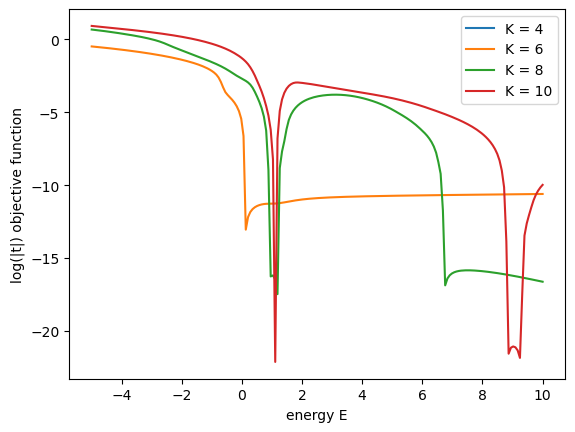

In [37]:
for k,depth in enumerate(depths):
    # print(vals)
    # print("\n",bc,"\n")
    plt.plot(erange,np.log(np.abs(values[k])),label = "K = {}".format(depth))
    plt.xlabel("energy E")
    plt.ylabel("log(|t|) objective function")
    # plt.title("neumann BCs on half line")
                
plt.legend()
plt.show()

## find spectrum of a Hamiltonian

In [38]:
potential = 'x^2 - 10*x^4 + x^8'
domain = 'R+'
bc = 'Neumann'

krange = [8,20]
elims = [-2,10]

search = Krange_Search(potential,domain,krange,elims,BC = bc,bins = 300,v = False,readvals = False,kstep = 2)

100%|███████████████████████████████████████████| 30/30 [00:00<00:00, 85.74it/s]


In [41]:
printKrangeResults(search)

Results at K = 8; 1 intervals found
	4.0 ± 6.0
Results at K = 10; 1 intervals found
	4.0 ± 6.0
Results at K = 12; 2 intervals found
	0.7457627118644068 ± 0.7118644067796611
	8.271186440677965 ± 1.7288135593220328
Results at K = 14; 2 intervals found
	0.8684979544126241 ± 0.19637638807714786
	9.120942257971848 ± 0.7618500430910657
Results at K = 16; 2 intervals found
	0.8007819585239524 ± 0.03385799794433575
	8.884506037702206 ± 0.15762414684642678
Results at K = 18; 0 intervals found


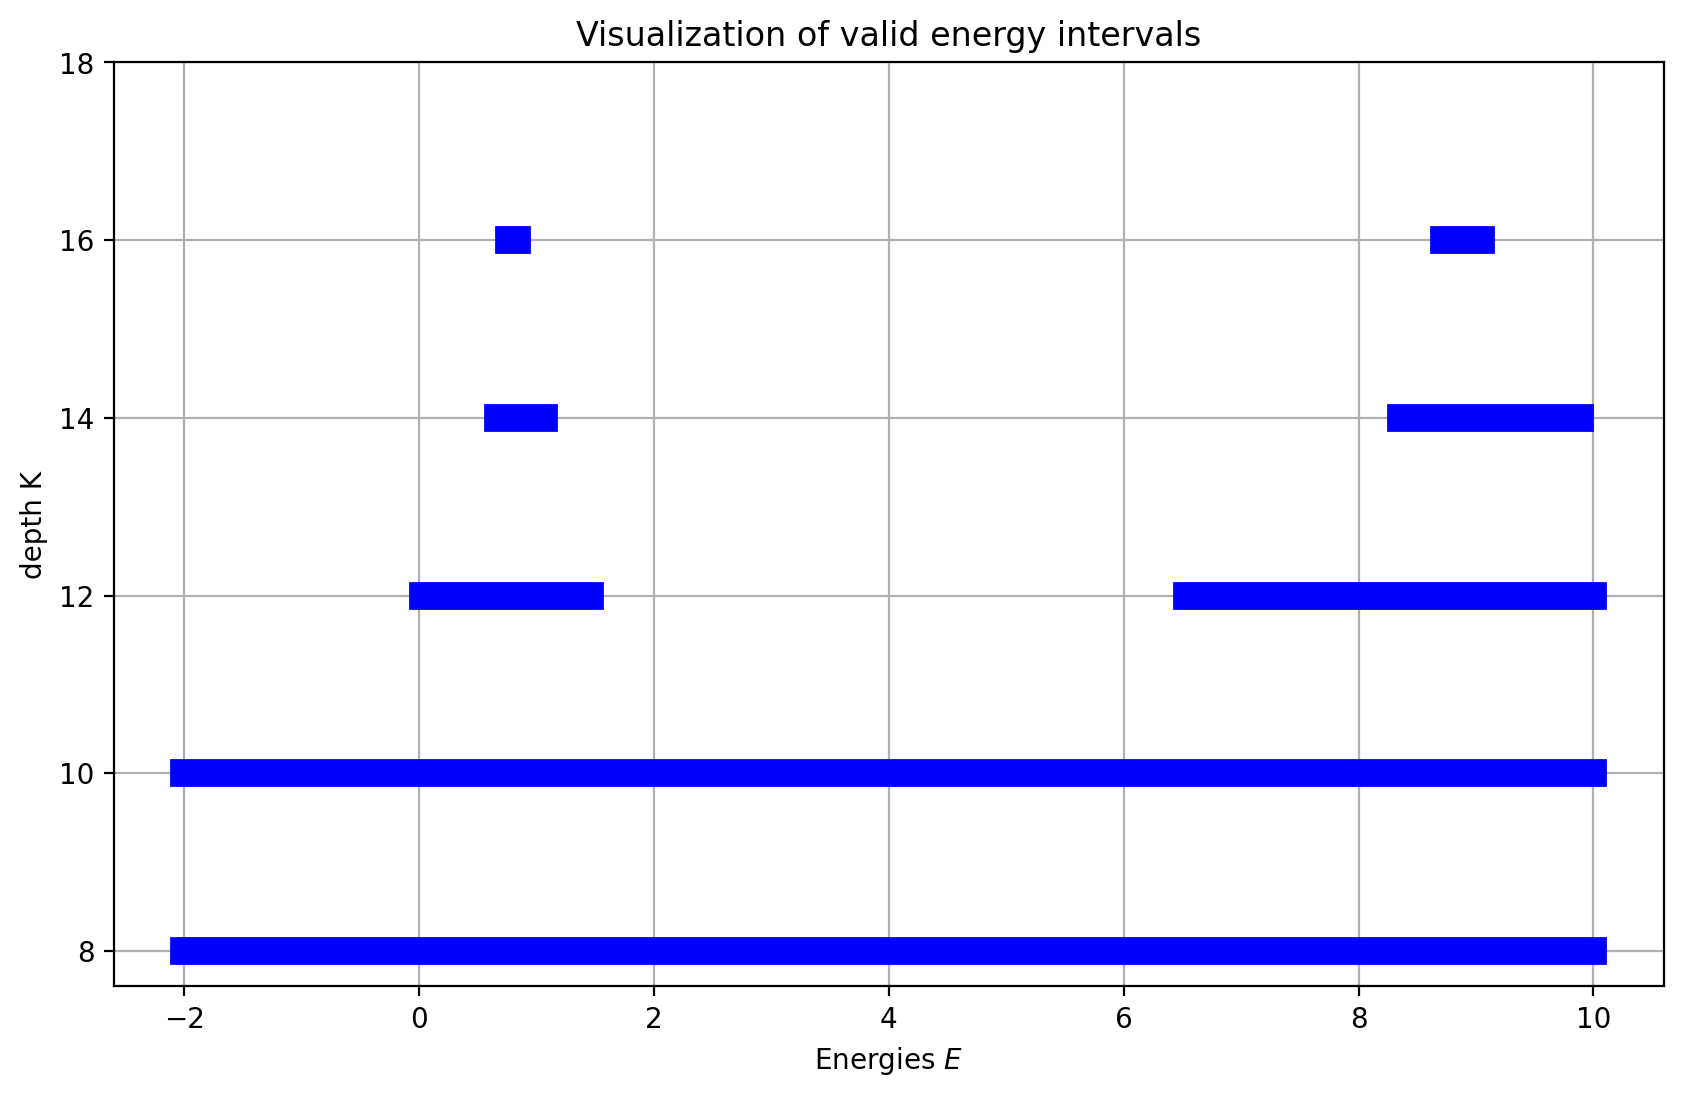

In [39]:
# Plotting
plt.figure(figsize=(10, 6),dpi = 200)

for key, intervals in search.items():
    for interval in intervals:
        plt.plot(interval, [key, key], marker='o',color = 'blue',linewidth = 10)
plt.yticks(sorted(search.keys()))
plt.xlabel(r'Energies $E$')
plt.ylabel('depth K')
plt.title('Visualization of valid energy intervals')
plt.grid(True)
plt.show()